In [1]:
from libsvm.commonutil import svm_read_problem
from libsvm.svmutil import *
from libsvm.svm import *
from sklearn.model_selection import KFold
import numpy as np
import math
import torch
from matplotlib import pyplot as plt

## SVM Accuracy and Cross-Validation for Model Selection

In [2]:
train_path = '/Users/dl/Downloads/HW3_2/DogsVsCats/DogsVsCats/DogsVsCats.train'
test_path = '/Users/dl/Downloads/HW3_2/DogsVsCats/DogsVsCats/DogsVsCats.test'

In [3]:
y, x = svm_read_problem(train_path)
y_test, x_test = svm_read_problem(test_path)

In [4]:
linear = svm_train(y, x, f'-t 0')
poly = svm_train(y, x, f'-t 1')

print('Linear Kernel')
label, acc, val = svm_predict(y_test, x_test, linear)
print('Polynomial Kernel')
label, acc, val = svm_predict(y_test, x_test, poly)

Linear Kernel
Accuracy = 59.2% (7400/12500) (classification)
Polynomial Kernel
Accuracy = 50.096% (6262/12500) (classification)


### The Linear Kernel has better result

In [5]:
kf = KFold(10, True)
i = 1
for train_index, test_index in kf.split(x):
    x_test = np.array(x)[test_index]
    x_train = np.array(x)[train_index]
    y_test = np.array(y)[test_index]
    y_train = np.array(y)[train_index]

    print('Iteration ' + str(i))
    print('Linear Kernel')
    linear = svm_train(y_train, x_train, '-t 0')
    p_label, p_acc, p_val = svm_predict(y_test, x_test, linear)

    print('Polynomial Kernel')
    poly = svm_train(y_train, x_train, '-t 1')
    p_label, p_acc, p_val = svm_predict(y_test, x_test, poly)

    i += 1

Iteration 1
Linear Kernel
Accuracy = 57.04% (713/1250) (classification)
Polynomial Kernel
Accuracy = 49.04% (613/1250) (classification)
Iteration 2
Linear Kernel
Accuracy = 59.2% (740/1250) (classification)
Polynomial Kernel
Accuracy = 48.64% (608/1250) (classification)
Iteration 3
Linear Kernel
Accuracy = 60% (750/1250) (classification)
Polynomial Kernel
Accuracy = 48.96% (612/1250) (classification)
Iteration 4
Linear Kernel
Accuracy = 59.28% (741/1250) (classification)
Polynomial Kernel
Accuracy = 49.04% (613/1250) (classification)
Iteration 5
Linear Kernel
Accuracy = 56.32% (704/1250) (classification)
Polynomial Kernel
Accuracy = 49.36% (617/1250) (classification)
Iteration 6
Linear Kernel
Accuracy = 61.04% (763/1250) (classification)
Polynomial Kernel
Accuracy = 49.92% (624/1250) (classification)
Iteration 7
Linear Kernel
Accuracy = 60.88% (761/1250) (classification)
Polynomial Kernel
Accuracy = 48.8% (610/1250) (classification)
Iteration 8
Linear Kernel
Accuracy = 62.72% (784/1250

## Boosting SVM

In [6]:
# torch.set_printoptions(precision=20)
y, x = svm_read_problem(train_path)
y_test, x_test = svm_read_problem(test_path)
linear = svm_train(y, x, f'-t 0')
label, acc, val = svm_predict(y_test, x_test, linear)

Accuracy = 59.2% (7400/12500) (classification)


In [7]:
def adaboost(K, input_, output, predict):
    weight =  torch.as_tensor([1 / len(input_)] * len(input_))
    alphaArr = []
    errorArr = []
    for idx in range(K):
      # get current different
      temp = output - predict
      
      delta = (temp > 0).float()
      error_rate = torch.dot(weight, delta)
      alpha = 1/2 * (math.log((1 - error_rate) / error_rate))

      alphaArr.append(alpha)
      errorArr.append(error_rate)

      weight = (weight * (math.exp(alpha))) / sum(weight * (math.exp(alpha)))
    return alphaArr, errorArr

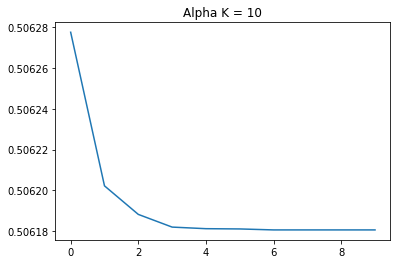

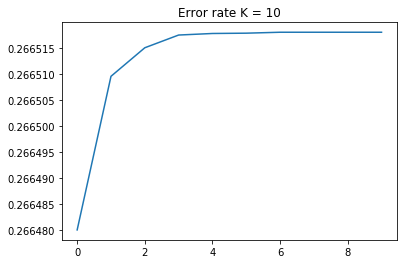

In [8]:
alpha_10, error_10 = adaboost(10, x_test, torch.as_tensor(y_test), torch.as_tensor(label))
plt.plot(alpha_10)
plt.title('Alpha K = 10')
plt.show()

plt.plot(error_10)
plt.title('Error rate K = 10')
plt.show()

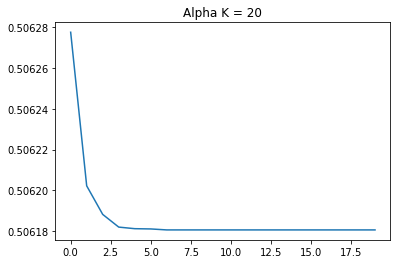

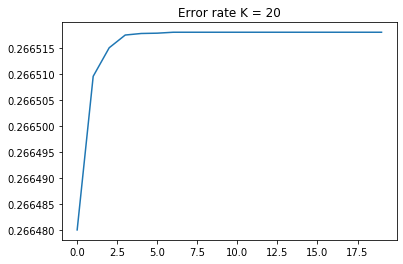

In [9]:
alpha_20, error_20 = adaboost(20, x_test, torch.as_tensor(y_test), torch.as_tensor(label))
plt.plot(alpha_20)
plt.title('Alpha K = 20')
plt.show()

plt.plot(error_20)
plt.title('Error rate K = 20')
plt.show()